# First Project: Sentiment Analysis

- Nama: Nicolas Debrito
- Email: nicolas.debrito66@gmail.com
- ID Dicoding: reezzy

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Embedding, Bidirectional, Dropout, Conv1D, BatchNormalization, SimpleRNN
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from warnings import filterwarnings
filterwarnings('ignore')

## Feature Extraction & Split

In [6]:
clean_df = pd.read_csv('labeling_data.csv')

In [7]:
clean_df

,review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemming,sentimen_score,sentimen
0,Clash of clans sekarang sering gangguan atau l...,Clash of clans sekarang sering gangguan atau l...,clash of clans sekarang sering gangguan atau l...,clash of clans sekarang sering gangguan atau l...,"['clash', 'of', 'clans', 'sekarang', 'sering',...","['clash', 'clans', 'sekarang', 'sering', 'gang...",clash clans sekarang sering ganggu lose connec...,-23,negative
1,Update bug update terbaru : 1.utk pelatihan pa...,Update bug update terbaru utk pelatihan pasuk...,update bug update terbaru utk pelatihan pasuk...,update bug update terbaru utk pelatihan pasuka...,"['update', 'bug', 'update', 'terbaru', 'utk', ...","['update', 'bug', 'update', 'terbaru', 'utk', ...",update bug update baru utk latih pasu pakai wa...,-8,negative
2,"Yth SuperCell, Coba buat suatu gebrakan yang b...",Yth SuperCell Coba buat suatu gebrakan yang be...,yth supercell coba buat suatu gebrakan yang be...,yth supercell coba buat suatu gebrakan yang be...,"['yth', 'supercell', 'coba', 'buat', 'suatu', ...","['yth', 'supercell', 'coba', 'buat', 'suatu', ...",yth supercell coba buat suatu gebrak beda sara...,-10,negative
3,aku kurangin bintang nya satu jadi bintang emp...,aku kurangin bintang nya satu jadi bintang emp...,aku kurangin bintang nya satu jadi bintang emp...,aku kurangin bintang nya satu jadi bintang emp...,"['aku', 'kurangin', 'bintang', 'nya', 'satu', ...","['aku', 'kurangin', 'bintang', 'satu', 'jadi',...",aku rangin bintang satu jadi bintang empat kel...,-21,negative
4,Game nya makin lama makin aneh karena: 1. Trof...,Game nya makin lama makin aneh karena Trofiny...,game nya makin lama makin aneh karena trofiny...,game nya makin lama makin aneh karena trofinya...,"['game', 'nya', 'makin', 'lama', 'makin', 'ane...","['game', 'makin', 'lama', 'makin', 'aneh', 'tr...",game makin lama makin aneh trofi sedikit kali ...,-8,negative
...,...,...,...,...,...,...,...,...,...
11995,Maaf supercell pembaruannya kurang bagus.. Apa...,Maaf supercell pembaruannya kurang bagus Apala...,maaf supercell pembaruannya kurang bagus apala...,maaf supercell pembaruannya kurang bagus apala...,"['maaf', 'supercell', 'pembaruannya', 'kurang'...","['maaf', 'supercell', 'pembaruannya', 'kurang'...",maaf supercell baru kurang bagus trophy legend...,-8,negative
11996,"update gamenya terlalu sering, Yang bagus cuma...",update gamenya terlalu sering Yang bagus cuma ...,update gamenya terlalu sering yang bagus cuma ...,update gamenya terlalu sering yang bagus cuma ...,"['update', 'gamenya', 'terlalu', 'sering', 'ya...","['update', 'gamenya', 'terlalu', 'sering', 'ba...",update gamenya terlalu sering bagus cuma grafi...,-12,negative
11997,"Please Kembalikan barak !, Karena itu adalah s...",Please Kembalikan barak Karena itu adalah seb...,please kembalikan barak karena itu adalah seb...,please kembalikan barak karena itu adalah sebu...,"['please', 'kembalikan', 'barak', 'karena', 'i...","['please', 'kembalikan', 'barak', 'sebuah', 'b...",please kembali barak buah bangun sangat pentin...,-8,negative
11998,"Untuk game COC ini seru, menantang, dan bertah...",Untuk game COC ini seru menantang dan bertahan...,untuk game coc ini seru menantang dan bertahan...,untuk game coc ini seru menantang dan bertahan...,"['untuk', 'game', 'coc', 'ini', 'seru', 'menan...","['game', 'coc', 'seru', 'menantang', 'bertahan...",game coc seru tantang tahan musuh sya tingkat ...,-16,negative


In [8]:
clean_df = clean_df.dropna()
print("Jumlah Ulasan", clean_df.shape[0])

Jumlah Ulasan 11997


In [9]:
clean_df['sentimen'].value_counts()

,count
sentimen,
negative,7616
positive,3758
neutral,623


In [10]:
negative_df = clean_df[clean_df['sentimen'] == 'negative']
positive_df = clean_df[clean_df['sentimen'] == 'positive']
neutral_df = clean_df[clean_df['sentimen'] == 'neutral']

upsampling_positive_df = resample(positive_df,
                    replace=True,
                    n_samples=len(negative_df),
                    random_state=1234)

upsampling_neutral_df = resample(neutral_df,
                    replace=True,
                    n_samples=len(negative_df),
                    random_state=1234)

print(f'Positif sahpe = {upsampling_positive_df.shape}')
print(f'Negatif sahpe = {negative_df.shape}')
print(f'Netral sahpe = {upsampling_neutral_df.shape}')

Positif sahpe = (7616, 9)
Negatif sahpe = (7616, 9)
Netral sahpe = (7616, 9)


In [11]:
balance_df = pd.concat([upsampling_positive_df, negative_df, upsampling_neutral_df], ignore_index=True)
balance_df

,review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemming,sentimen_score,sentimen
0,"Game nya cukup seru, saya player lama, saran b...",Game nya cukup seru saya player lama saran bua...,game nya cukup seru saya player lama saran bua...,game nya cukup seru saya player lama saran bua...,"['game', 'nya', 'cukup', 'seru', 'saya', 'play...","['game', 'cukup', 'seru', 'player', 'lama', 's...",game cukup seru player lama saran buat develop...,4,positive
1,Min coc gw pas di update kok jaringan data/wif...,Min coc gw pas di update kok jaringan datawifi...,min coc gw pas di update kok jaringan datawifi...,min coc gw pas di update kok jaringan datawifi...,"['min', 'coc', 'gw', 'pas', 'di', 'update', 'k...","['min', 'coc', 'gw', 'pas', 'update', 'kok', '...",min coc gw pas update kok jaring datawifi jadi...,5,positive
2,"Jaringan full tapi kenapa susah kebuka ,..perb...",Jaringan full tapi kenapa susah kebuka perbaik...,jaringan full tapi kenapa susah kebuka perbaik...,jaringan full tapi kenapa susah kebuka perbaik...,"['jaringan', 'full', 'tapi', 'kenapa', 'susah'...","['jaringan', 'full', 'susah', 'kebuka', 'perba...",jaring full susah buka baik supercell,2,positive
3,Semenjak update Kenapa susah banget buka coc.....,Semenjak update Kenapa susah banget buka coc p...,semenjak update kenapa susah banget buka coc p...,semenjak update kenapa susah banget buka coc p...,"['semenjak', 'update', 'kenapa', 'susah', 'ban...","['semenjak', 'update', 'susah', 'banget', 'buk...",semenjak update susah banget buka coc padahal ...,2,positive
4,"Aku kasih bintang 3 dulu dan auto uinstal, kar...",Aku kasih bintang dulu dan auto uinstal karen...,aku kasih bintang dulu dan auto uinstal karen...,aku kasih bintang dulu dan auto uinstal karena...,"['aku', 'kasih', 'bintang', 'dulu', 'dan', 'au...","['aku', 'kasih', 'bintang', 'dulu', 'auto', 'u...",aku kasih bintang dulu auto uinstal update ban...,5,positive
...,...,...,...,...,...,...,...,...,...
22843,"Padahal mau main kembali, saat masuk peta tuka...",Padahal mau main kembali saat masuk peta tukan...,padahal mau main kembali saat masuk peta tukan...,padahal mau main kembali saat masuk peta tukan...,"['padahal', 'mau', 'main', 'kembali', 'saat', ...","['padahal', 'mau', 'main', 'masuk', 'peta', 't...",padahal mau main masuk peta tukang malah force...,0,neutral
22844,"setiap update pasti selalu ada bug, anoying bngt",setiap update pasti selalu ada bug anoying bngt,setiap update pasti selalu ada bug anoying bngt,setiap update pasti selalu ada bug anoying bngt,"['setiap', 'update', 'pasti', 'selalu', 'ada',...","['update', 'selalu', 'bug', 'anoying', 'bngt']",update selalu bug anoying bngt,0,neutral
22845,Pengembangan nya udah cukup baik dan meningkat...,Pengembangan nya udah cukup baik dan meningkat...,pengembangan nya udah cukup baik dan meningkat...,pengembangan nya udah cukup baik dan meningkat...,"['pengembangan', 'nya', 'udah', 'cukup', 'baik...","['pengembangan', 'udah', 'cukup', 'baik', 'men...",kembang udah cukup baik meningkattapi waktu bu...,0,neutral
22846,"Game sangat bagus,terkadang lostconnect untuk ...",Game sangat bagusterkadang lostconnect untuk b...,game sangat bagusterkadang lostconnect untuk b...,game sangat bagusterkadang lostconnect untuk b...,"['game', 'sangat', 'bagusterkadang', 'lostconn...","['game', 'sangat', 'bagusterkadang', 'lostconn...",game sangat bagusterkadang lostconnect hari akhir,0,neutral


In [12]:
X = balance_df['text_stemming']
y = balance_df['sentimen']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

print(X_train.shape)
print(X_test.shape)

(18278,)
(4570,)


In [14]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [15]:
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()

## Build Model Skema SVM

In [16]:
model_title = ['SVM']
accuracy = []
result = []

best_model = SVC(C=1, kernel='rbf')
best_model.fit(X_train_array, y_train)

y_pred = best_model.predict(X_test_array)
accuracy.append(accuracy_score(y_test, y_pred))
result.append([y_test, y_pred])

print(f"{model_title[0]} - Used Params: C=1, kernel='rbf'\n")
print(classification_report(y_test, y_pred))

SVM - Used Params: C=1, kernel='rbf'

              precision    recall  f1-score   support

    negative       0.97      0.96      0.96      1521
     neutral       1.00      1.00      1.00      1514
    positive       0.96      0.97      0.96      1535

    accuracy                           0.98      4570
   macro avg       0.98      0.98      0.98      4570
weighted avg       0.98      0.98      0.98      4570



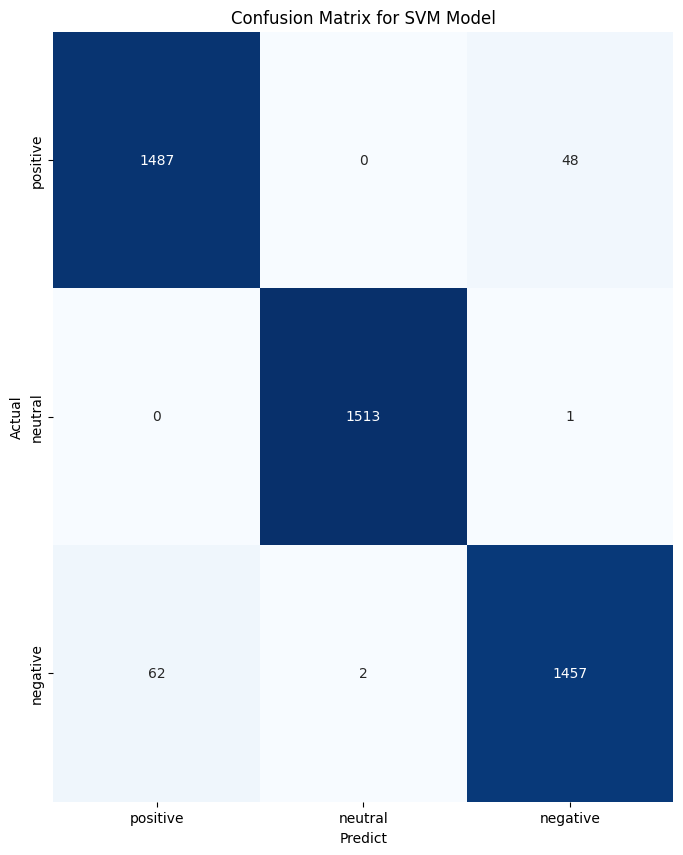

In [17]:
for i in range(len(model_title)):
    y_test, y_pred = result[i]
    confussion = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

    plt.figure(figsize=(8, 10))
    plt.subplot(1, 1, i+1)
    sns.heatmap(confussion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_title[i]} Model')
    plt.xlabel('Predict')
    plt.xticks(ticks=[i + 0.5 for i in range(3)], labels=['positive', 'neutral', 'negative'])
    plt.ylabel('Actual')
    plt.yticks(ticks=[i + 0.5 for i in range(3)], labels=['positive', 'neutral', 'negative'])
    plt.show()

In [18]:
text = "tolong perbaiki masalah jaringan"
transform_text = tfidf.transform([text]).toarray()

print(f'Hasil prediksi menggunakan SVM adalah {best_model.predict(transform_text)}')

Hasil prediksi menggunakan SVM adalah ['negative']


## Build Model Skema Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

model_title = ['Logistic Regression']
accuracy = []
result = []

# Define and train the Logistic Regression model
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_array, y_train)

# Make predictions
y_pred = best_model.predict(X_test_array)
accuracy.append(accuracy_score(y_test, y_pred))
result.append([y_test, y_pred])

# Display results
print(f"{model_title[0]} - Used Params: max_iter=1000\n")
print(classification_report(y_test, y_pred))

Logistic Regression - Used Params: max_iter=1000

              precision    recall  f1-score   support

    negative       0.96      0.86      0.90      1521
     neutral       0.87      0.96      0.92      1514
    positive       0.92      0.92      0.92      1535

    accuracy                           0.91      4570
   macro avg       0.92      0.91      0.91      4570
weighted avg       0.92      0.91      0.91      4570



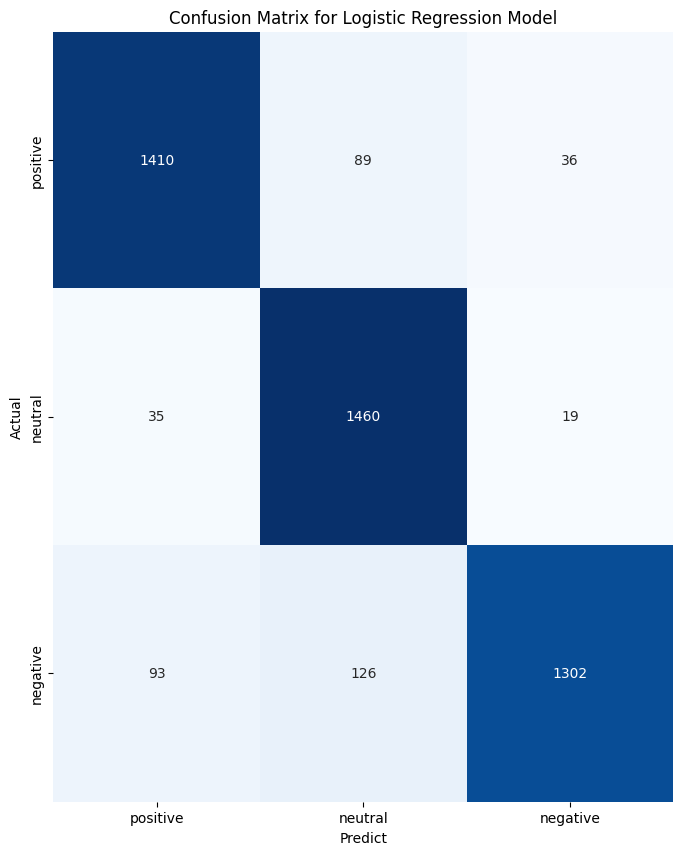

In [20]:
for i in range(len(model_title)):
    y_test, y_pred = result[i]
    confussion = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

    plt.figure(figsize=(8, 10))
    plt.subplot(1, 1, i+1)
    sns.heatmap(confussion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_title[i]} Model')
    plt.xlabel('Predict')
    plt.xticks(ticks=[i + 0.5 for i in range(3)], labels=['positive', 'neutral', 'negative'])
    plt.ylabel('Actual')
    plt.yticks(ticks=[i + 0.5 for i in range(3)], labels=['positive', 'neutral', 'negative'])
    plt.show()

In [21]:
text = "Game lemot jelek banget"
trasform_text = tfidf.transform([text]).toarray()

print(f'Hasil prediksi menggunakan Logistic Regression adalah {best_model.predict(transform_text)}')

Hasil prediksi menggunakan Logistic Regression adalah ['negative']


## Build Model Skema RNN

In [22]:
sentiment = pd.get_dummies(balance_df['sentimen']).astype(int)
final_df = pd.concat([balance_df, sentiment], axis=1)
final_df = final_df.drop(columns='sentimen')
final_df

,review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemming,sentimen_score,negative,neutral,positive
0,"Game nya cukup seru, saya player lama, saran b...",Game nya cukup seru saya player lama saran bua...,game nya cukup seru saya player lama saran bua...,game nya cukup seru saya player lama saran bua...,"['game', 'nya', 'cukup', 'seru', 'saya', 'play...","['game', 'cukup', 'seru', 'player', 'lama', 's...",game cukup seru player lama saran buat develop...,4,0,0,1
1,Min coc gw pas di update kok jaringan data/wif...,Min coc gw pas di update kok jaringan datawifi...,min coc gw pas di update kok jaringan datawifi...,min coc gw pas di update kok jaringan datawifi...,"['min', 'coc', 'gw', 'pas', 'di', 'update', 'k...","['min', 'coc', 'gw', 'pas', 'update', 'kok', '...",min coc gw pas update kok jaring datawifi jadi...,5,0,0,1
2,"Jaringan full tapi kenapa susah kebuka ,..perb...",Jaringan full tapi kenapa susah kebuka perbaik...,jaringan full tapi kenapa susah kebuka perbaik...,jaringan full tapi kenapa susah kebuka perbaik...,"['jaringan', 'full', 'tapi', 'kenapa', 'susah'...","['jaringan', 'full', 'susah', 'kebuka', 'perba...",jaring full susah buka baik supercell,2,0,0,1
3,Semenjak update Kenapa susah banget buka coc.....,Semenjak update Kenapa susah banget buka coc p...,semenjak update kenapa susah banget buka coc p...,semenjak update kenapa susah banget buka coc p...,"['semenjak', 'update', 'kenapa', 'susah', 'ban...","['semenjak', 'update', 'susah', 'banget', 'buk...",semenjak update susah banget buka coc padahal ...,2,0,0,1
4,"Aku kasih bintang 3 dulu dan auto uinstal, kar...",Aku kasih bintang dulu dan auto uinstal karen...,aku kasih bintang dulu dan auto uinstal karen...,aku kasih bintang dulu dan auto uinstal karena...,"['aku', 'kasih', 'bintang', 'dulu', 'dan', 'au...","['aku', 'kasih', 'bintang', 'dulu', 'auto', 'u...",aku kasih bintang dulu auto uinstal update ban...,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
22843,"Padahal mau main kembali, saat masuk peta tuka...",Padahal mau main kembali saat masuk peta tukan...,padahal mau main kembali saat masuk peta tukan...,padahal mau main kembali saat masuk peta tukan...,"['padahal', 'mau', 'main', 'kembali', 'saat', ...","['padahal', 'mau', 'main', 'masuk', 'peta', 't...",padahal mau main masuk peta tukang malah force...,0,0,1,0
22844,"setiap update pasti selalu ada bug, anoying bngt",setiap update pasti selalu ada bug anoying bngt,setiap update pasti selalu ada bug anoying bngt,setiap update pasti selalu ada bug anoying bngt,"['setiap', 'update', 'pasti', 'selalu', 'ada',...","['update', 'selalu', 'bug', 'anoying', 'bngt']",update selalu bug anoying bngt,0,0,1,0
22845,Pengembangan nya udah cukup baik dan meningkat...,Pengembangan nya udah cukup baik dan meningkat...,pengembangan nya udah cukup baik dan meningkat...,pengembangan nya udah cukup baik dan meningkat...,"['pengembangan', 'nya', 'udah', 'cukup', 'baik...","['pengembangan', 'udah', 'cukup', 'baik', 'men...",kembang udah cukup baik meningkattapi waktu bu...,0,0,1,0
22846,"Game sangat bagus,terkadang lostconnect untuk ...",Game sangat bagusterkadang lostconnect untuk b...,game sangat bagusterkadang lostconnect untuk b...,game sangat bagusterkadang lostconnect untuk b...,"['game', 'sangat', 'bagusterkadang', 'lostconn...","['game', 'sangat', 'bagusterkadang', 'lostconn...",game sangat bagusterkadang lostconnect hari akhir,0,0,1,0


In [23]:
X = final_df['text_stemming'].values
y = final_df[['negative',	'neutral',	'positive']].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)

(18278,)
(4570,)


In [25]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sequence_train, padding='post', maxlen=50, truncating='post')
padded_test = pad_sequences(sequence_test, padding='post', maxlen=50, truncating='post')

In [26]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),

    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),

    Bidirectional(SimpleRNN(128, return_sequences=True, kernel_regularizer=l2(0.001))),
    Dropout(0.4),
    Bidirectional(SimpleRNN(96, return_sequences=True, kernel_regularizer=l2(0.001))),
    Dropout(0.4),
    Bidirectional(SimpleRNN(48, kernel_regularizer=l2(0.001))),
    Dropout(0.4),

    Dense(192, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(96, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(48, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='softmax')
])

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [28]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
          print("\nAkurasi telah mencapai >92%")
          self.model.stop_training = True

callbacks = myCallback()

In [29]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    padded_train,
    y_train,
    epochs=30,
    batch_size=74,
    validation_data=(padded_test, y_test),
    callbacks=[callbacks, reduce_lr]
)

Epoch 1/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.3435 - loss: 2.2774 - val_accuracy: 0.3545 - val_loss: 1.9928 - learning_rate: 0.0010
Epoch 2/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.3543 - loss: 1.9937 - val_accuracy: 0.3779 - val_loss: 1.8864 - learning_rate: 0.0010
Epoch 3/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.4599 - loss: 1.7443 - val_accuracy: 0.5665 - val_loss: 1.4636 - learning_rate: 0.0010
Epoch 4/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.5877 - loss: 1.3882 - val_accuracy: 0.6433 - val_loss: 1.1330 - learning_rate: 0.0010
Epoch 5/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7283 - loss: 1.0304 - val_accuracy: 0.7851 - val_loss: 0.8613 - learning_rate: 0.0010
Epoch 6/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8238 - loss: 0.7488 - val_accuracy: 0.8584 - val_loss: 0.6710 - learning_rate: 0.0010
Epoch 7/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8660 - los

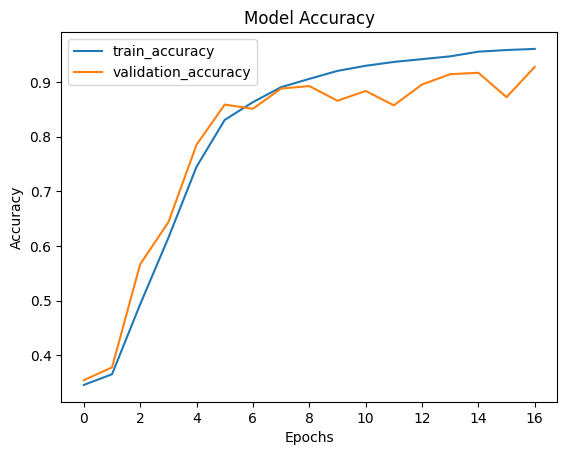

In [30]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

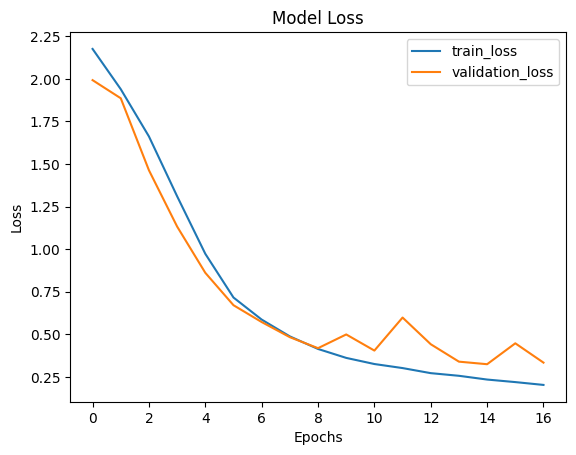

In [31]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [32]:
text = "jelek lemot sering keluar sendiri"

new_sequences = tokenizer.texts_to_sequences([text])
new_padded = pad_sequences(new_sequences, padding='post', maxlen=50, truncating='post')

predictions = model.predict(new_padded)
predicted_classes = np.argmax(predictions, axis=1)

class_labels = ['negative', 'neutral', 'positive']
predicted_label = class_labels[predicted_classes[0]]

print(f"Hasil prediksi menggunakan RNN adalah {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Hasil prediksi menggunakan RNN adalah negative
